In [1]:
import pathlib
import pandas as pd
import dask.dataframe as dd
from config import load_config
import visualizations
import numpy as np
import utils
config = load_config()

origin_files = pathlib.Path(config['datapath'])
processed_files = pathlib.Path("processed_data") / origin_files.name

In [2]:
df1 = dd.read_parquet(origin_files).repartition(npartitions=1).reset_index(drop=True)
df2 = dd.read_parquet(processed_files).repartition(npartitions=1).reset_index(drop=True)
df = dd.concat([df1, df2], axis=1)

df["income_bin"] = utils.create_bins(df, "income", 5)
df["age_bin"] = utils.create_bins(df, "age", 5)
df["average_price_bin"] = utils.create_bins(df, "average_price", 5)
df["total_price"] = df["average_price"]*df["item_count"]
df["total_price_bin"] = utils.create_bins(df, "total_price", 5)
df["credit_score_bin"] = utils.create_bins(df, "credit_score", 5)

numeric_col = ["age", "income", "average_price", "total_price", "credit_score"]
discrete_col = ["age_bin", "income_bin", "average_price_bin", "total_price_bin", "credit_score_bin", "gender", "country", "category"]

In [13]:
# 利用Pearson系数计算相关性
for i in range(len(numeric_col)):
    for j in range(i+1, len(numeric_col)):
        corr = df[numeric_col[i]].corr(df[numeric_col[j]]).compute()
        print(f"Pearson correlation {numeric_col[i]} and {numeric_col[j]}: {corr:.8f}")

Pearson correlation age and income: -0.00017969
Pearson correlation age and average_price: 0.00001854
Pearson correlation age and total_price: -0.00012619
Pearson correlation age and credit_score: 0.99992588
Pearson correlation income and average_price: 0.00188650
Pearson correlation income and total_price: 0.00038083
Pearson correlation income and credit_score: -0.00016226
Pearson correlation average_price and total_price: 0.68641170
Pearson correlation average_price and credit_score: 0.00000959
Pearson correlation total_price and credit_score: -0.00012697


In [ ]:
# 利用卡方计算相关性
for i in range(len(discrete_col)):
    for j in range(i+1, len(discrete_col)):
        chi2, p, dof, expected = utils.x2_test(df, discrete_col[i], discrete_col[j])
        print(f"chi2 and p of {discrete_col[i]} and {discrete_col[j]}: {chi2}, {p}")

chi2 and p of age_bin and income_bin: 168.27776413288132, 1.856611557592917e-27
chi2 and p of age_bin and average_price_bin: 262.1414356022193, 1.6613530857639152e-46
chi2 and p of age_bin and total_price_bin: 269.59449475017885, 4.8597322112054204e-48
chi2 and p of age_bin and gender: 261.7670738277743, 4.786601777443289e-49
chi2 and p of age_bin and country: 355.7957108832969, 3.0557360322973715e-54
chi2 and p of age_bin and category: 160.90859449866437, 5.426775311955644e-26
chi2 and p of income_bin and average_price_bin: 140.22138943251647, 6.521021812619046e-22
chi2 and p of income_bin and total_price_bin: 275.02677485715935, 3.69141838737883e-49
chi2 and p of income_bin and gender: 110.48209037085353, 4.804255294048732e-18
chi2 and p of income_bin and country: 352.6319208806713, 1.278162189692228e-53
chi2 and p of income_bin and category: 199.19464052824716, 1.1535573824436787e-33
chi2 and p of average_price_bin and total_price_bin: 6098057.23675321, 0.0
chi2 and p of average_pri

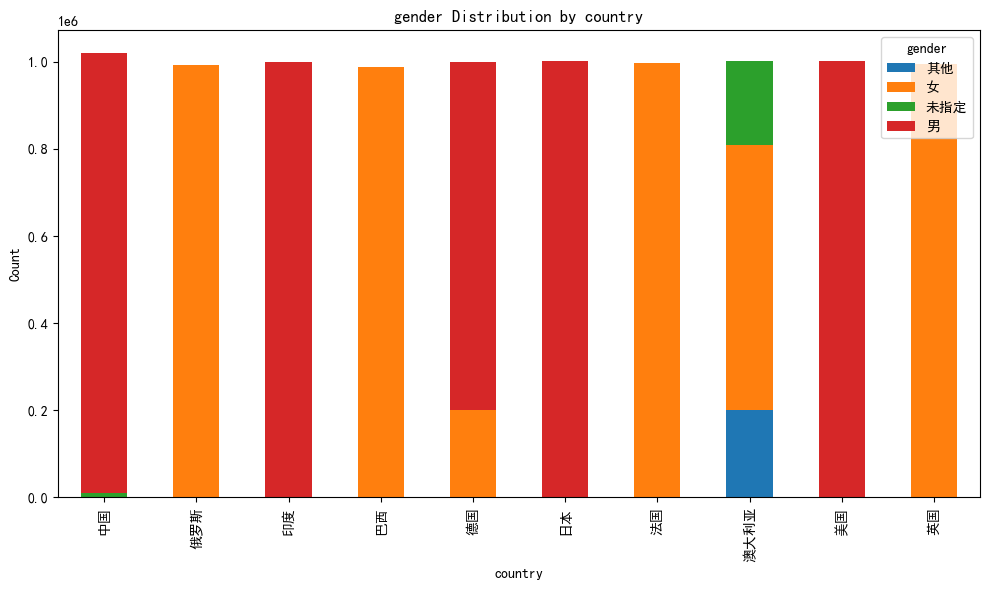

In [3]:
visualizations.draw_stacked_barplot(df, category_col='country', subcategory_col='gender')


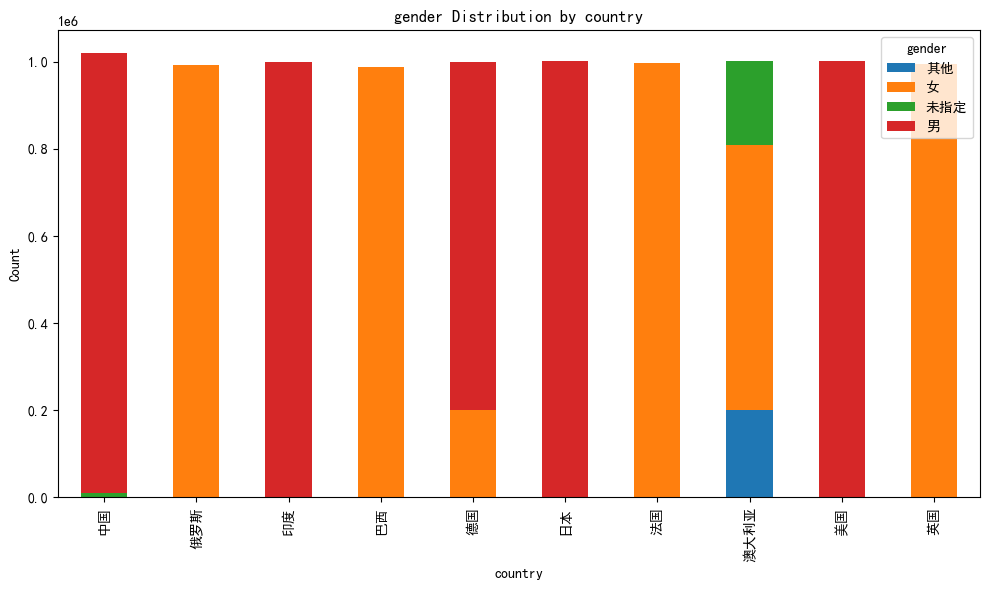

In [ ]:
visualizations.draw_stacked_barplot(df, category_col='country', subcategory_col='gender')


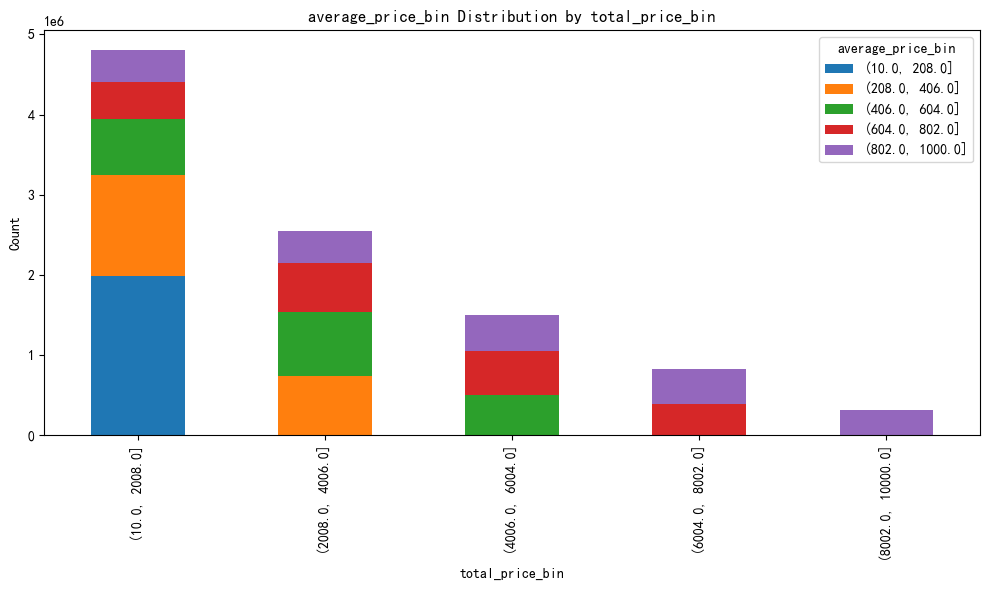

In [11]:
visualizations.draw_stacked_barplot(df, category_col='total_price_bin', subcategory_col='average_price_bin')


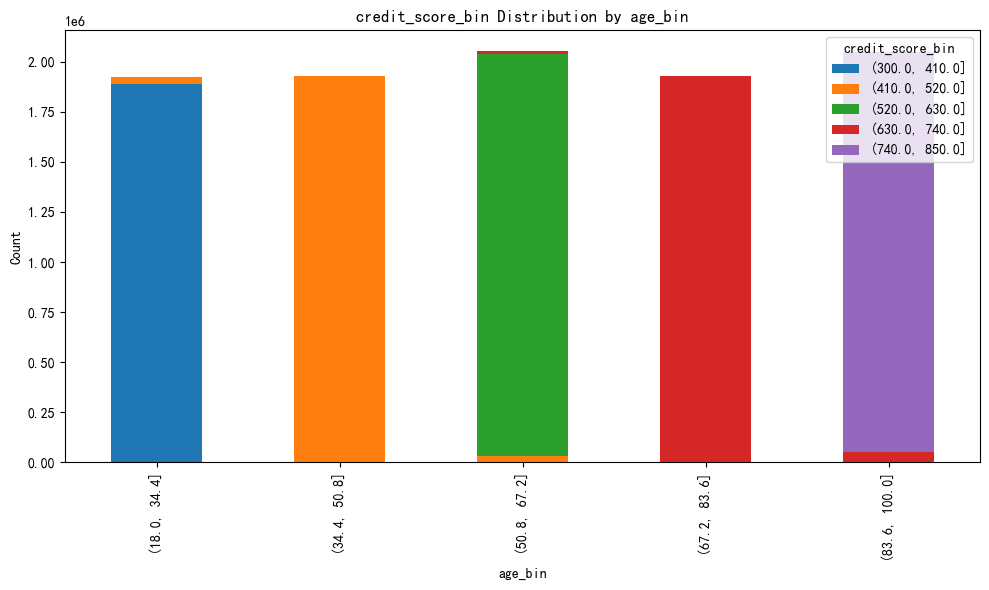

In [3]:
visualizations.draw_stacked_barplot(df, category_col='age_bin', subcategory_col='credit_score_bin')
